# Loan Application Status Prediction

Loan Data Description:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

## Independent Variables: 

Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, Loan_Amount, Loan_Amount_Term, Credit History, Property_Area

## Dependent Variable (Target Variable): 

Loan_Status

### Here we have to predict the loan status of the person

### Here we start the project by importing essential Libraries for Importing Datasets, EDA, Data Cleaning, Model Building, Removing Outliers 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_auc_score, f1_score, roc_curve
from scipy.stats import zscore
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.preprocessing import LabelEncoder, power_transform, StandardScaler, MinMaxScaler

After importing all the needed Libraries we are good to go with Data Importation Using Pandas

In [2]:
#Importing Dataset from local Directory using Pandas.read_csv() and storing it in a variable
ds = pd.read_csv('~/Desktop/Datatrained/Loan Application Status Prediction/loan.csv')

In [3]:
#importation is completed and the datasets is stored in ds variable
print(type(ds))

<class 'pandas.core.frame.DataFrame'>


From above code we came to know that the dataset has been imported in 'ds' variable of Pandas Dataframe

By using ds.head() we can see first 5 rows of the whole datasets we can view more number of rows by using ds.head(10) or ds.head(20) or any number inside the method like head(23 | 30)

In [4]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


From above we can see out output varible that is Loan_Status has 2 values Y and N so it is a Classifiaction Problem

by looking  at the above data we can see that the dataset is a mixture of object, float type of data to know more information about the data we will use ds.info()

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


from above we can see that there are total 614 rows in the dataset and 13 columns some of the columns are missing values we will fix it later

Gender, Married, Dependents, Self-Employed, Loan Amount, Loan_Amount_Term, Credit History has missing values

from above we can also see that there are 4 float64, 1 int64 and 8 object variable in the dataset

now let us look at the shape of the data from above we know that there are 13 columns and 614 rows in the dataset

In [6]:
r, c = ds.shape
print("Number of rows are {} and columns are {}".format(r, c))

Number of rows are 614 and columns are 13


from here also we can see that there are 614 rows and 13 columns 

lets us now see the missing values in the data using ds.isnull().sum()

In [7]:
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

from above we can see that there are 7 columns with missing values so let us see this how the visualization look when data's are missing

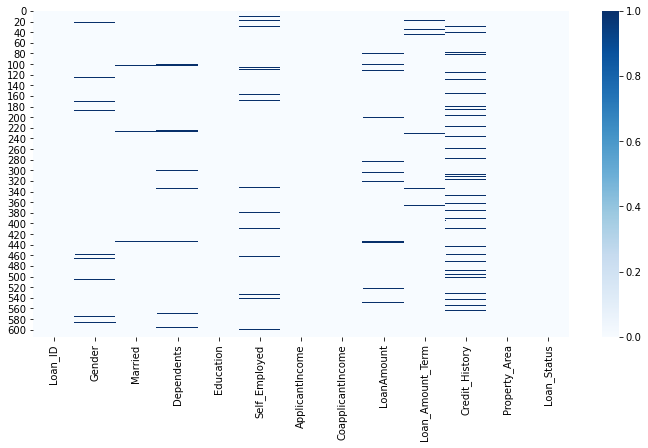

In [8]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.isnull(), cmap = 'Blues')

from here we can see that there are some lines in the dataset so those are the missing values in the data

lets see the column names of the datset using ds.columns

In [9]:
ds.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

lets now see some Stastics about the data using ds.describe()

In [10]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


from here we can see that there are some outliers in the dataset we will fix it later now lets see this using visualization

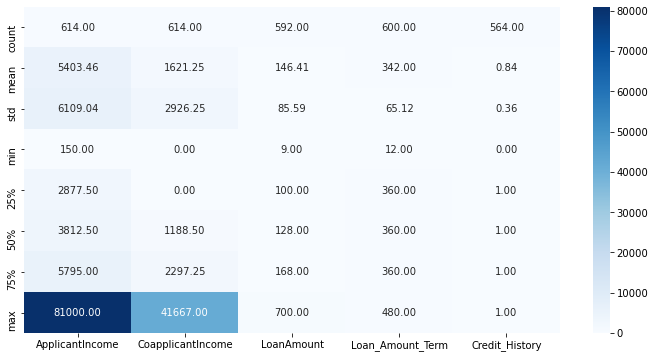

In [11]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.describe(), annot = True, fmt = '.2f', cmap = 'Blues')

from here we can see the outliers easily so we will remove it later

lets see the correlation of the dataset using ds.corr()

In [12]:
ds.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


lets see the correlation in a visualization format

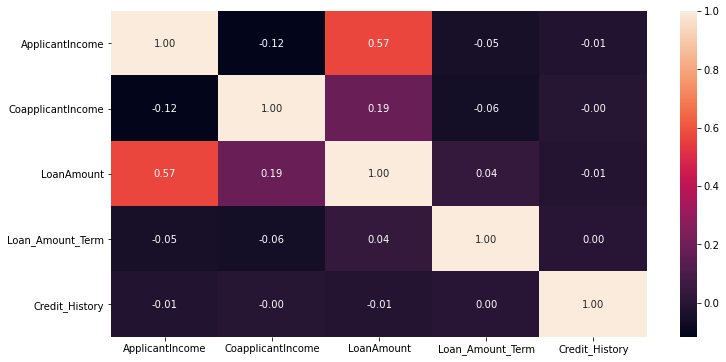

In [13]:
plt.figure(figsize = (12,6))
sns.heatmap(ds.corr(), annot = True, fmt = '.2f')

darker the color lesser the correlation 

lets see the value count of all the columns using ds[col].value_counts()

In [14]:
for i in ds.columns:
    print(ds[i].value_counts())

LP001935    1
LP002053    1
LP001639    1
LP002226    1
LP002002    1
           ..
LP002449    1
LP002297    1
LP002004    1
LP001949    1
LP002370    1
Name: Loan_ID, Length: 614, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: L

from above we can see that we can convert float64 to int as there are no data after decimal point we will change it later.

## lets now Start with EDA

In [15]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
def countplot(col):
    plt.figure(figsize = (12,6))
    sns.countplot(ds[col])

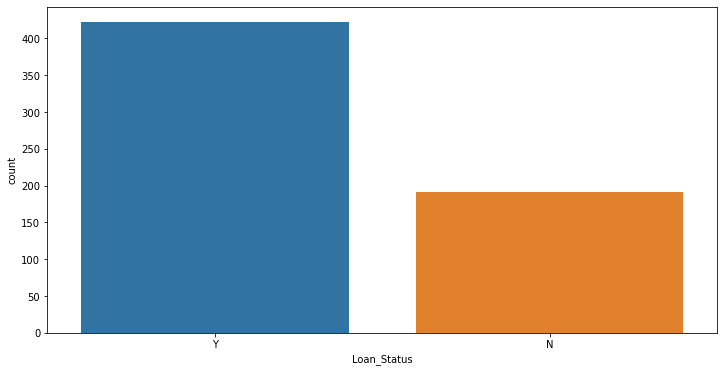

In [17]:
countplot('Loan_Status')

from here we can see most of the person has there loan_status approved

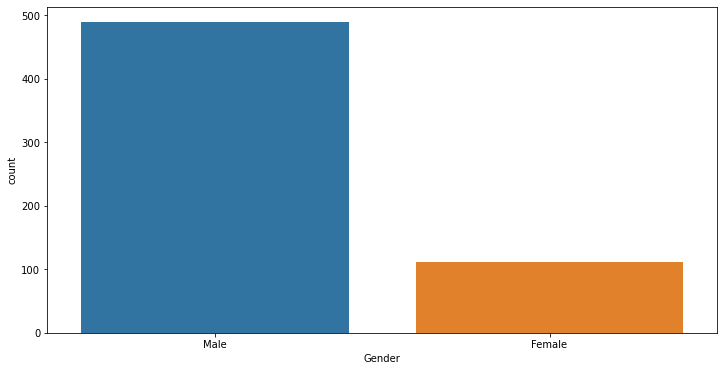

In [18]:
countplot('Gender')

There are more number of Male than the female in the dataset

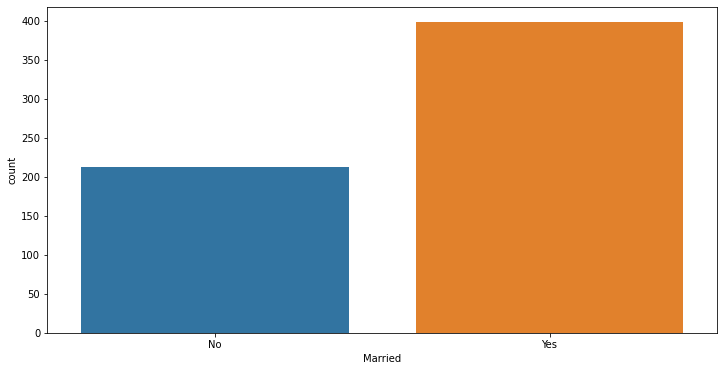

In [19]:
countplot('Married')

Most of them are married

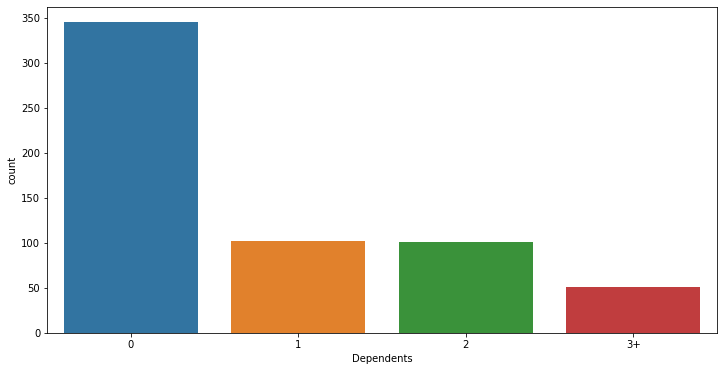

In [20]:
countplot('Dependents')

Here we can see the count of the dependents in the dataset

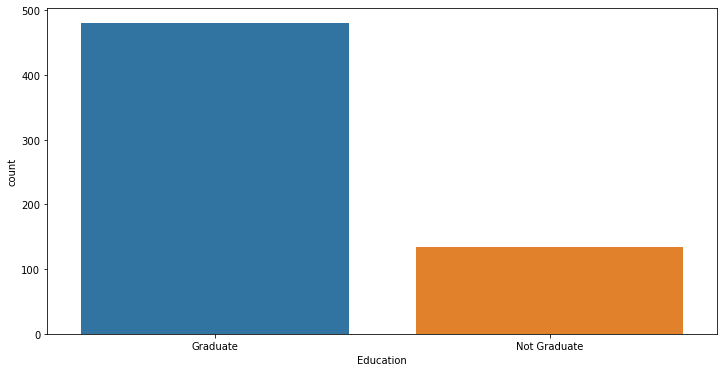

In [21]:
countplot('Education')

Most of the person are graduate 

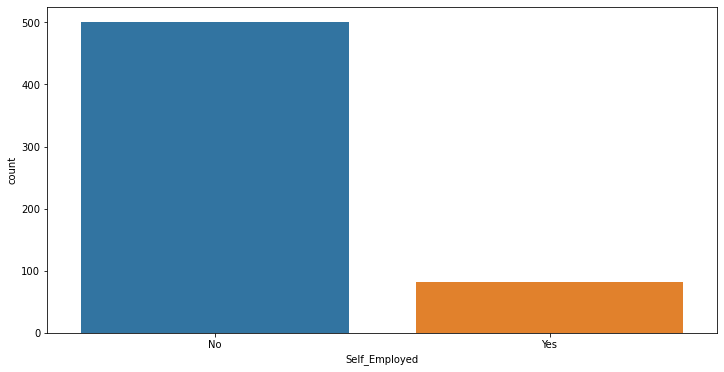

In [22]:
countplot('Self_Employed')

From here we can see that most of them are not self_employed

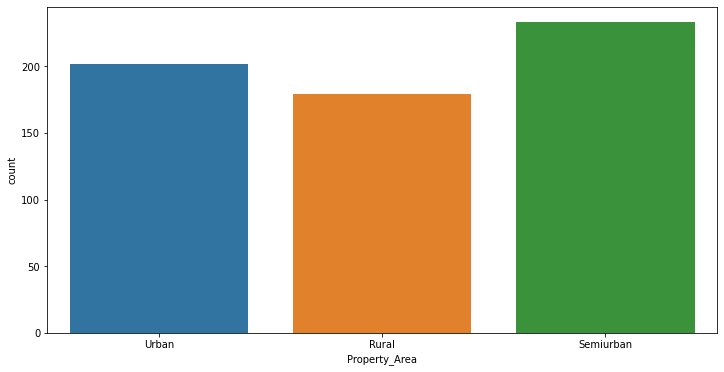

In [23]:
countplot('Property_Area')

Here we have the count plot of the Area where the people live most of them live in a semi urban area then Urban and atlast Rural

In [24]:
def count(col, hue):
    plt.figure(figsize = (12,6))
    sns.countplot(ds[col], hue = ds[hue])

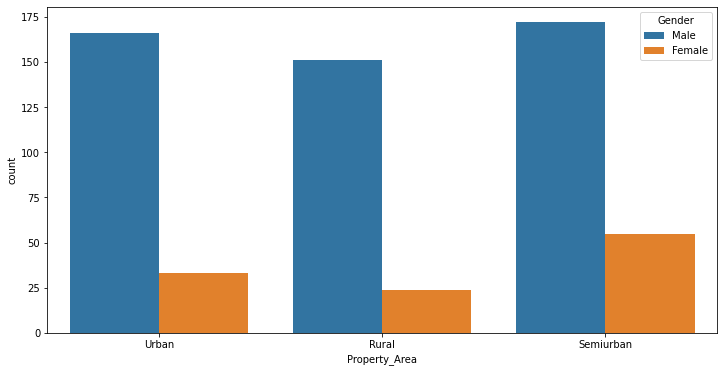

In [25]:
count('Property_Area','Gender')

from above we can see the distribution of Gender and Propert Area where people live

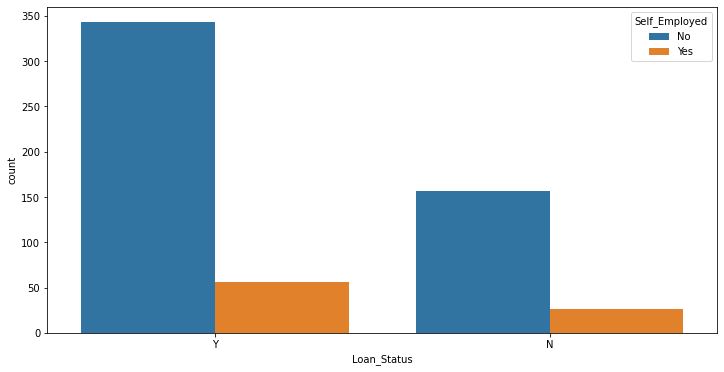

In [26]:
count('Loan_Status','Self_Employed')

from above we can see the distribution of Loan_Status and the Self_employed

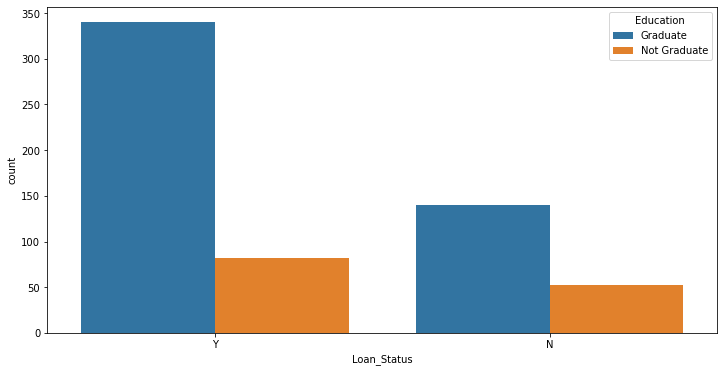

In [27]:
count('Loan_Status','Education')

from above we can see people who are graduated has tendency of getting loans than who are not

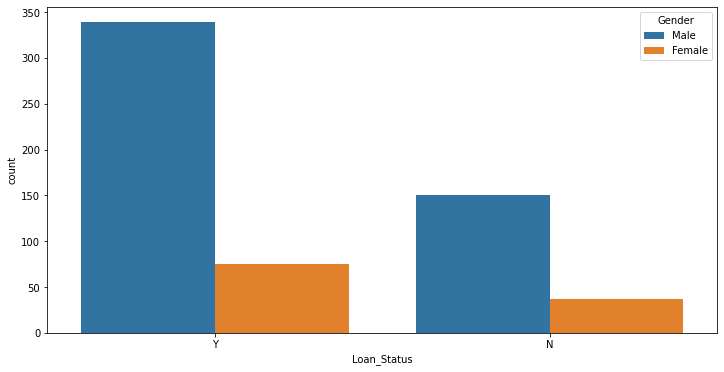

In [28]:
count('Loan_Status','Gender')

there are more number of males applying for the loans compared to female

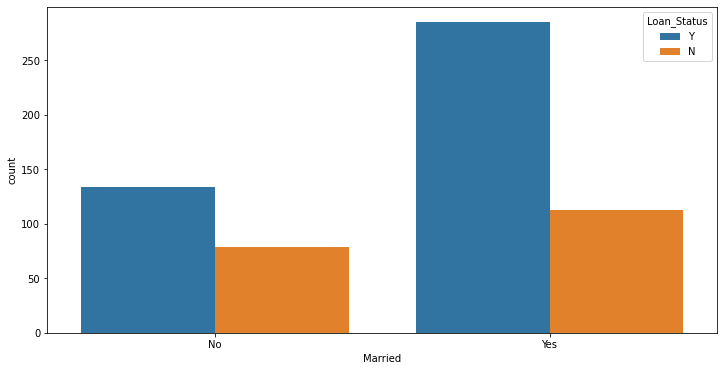

In [29]:
count('Married', 'Loan_Status')

people geting loans to not getting loans when they are married is high

In [30]:
def bar(col1, col2):
    plt.figure(figsize = (12,6))
    sns.barplot(x = col2, y = col1, data = ds)

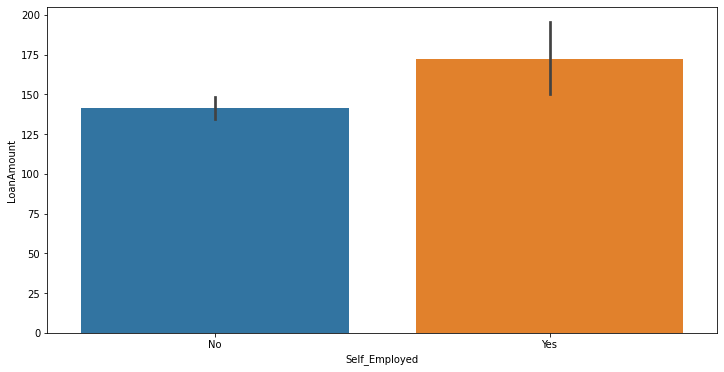

In [31]:
bar('LoanAmount', 'Self_Employed')

from above we can see that self_employed has higher loanamount

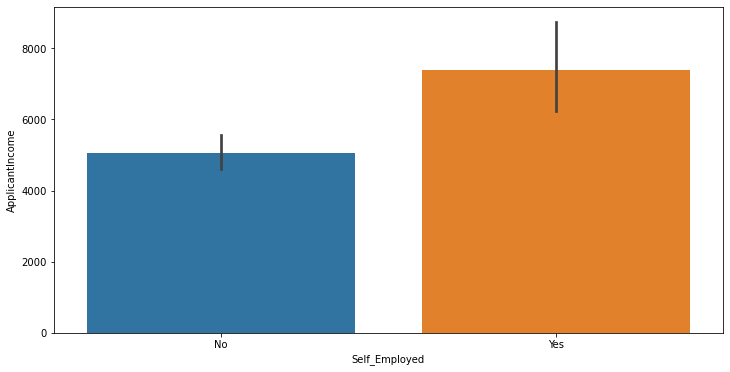

In [32]:
bar('ApplicantIncome','Self_Employed')

from above we can see the Applicant Income of  Self-Employed People

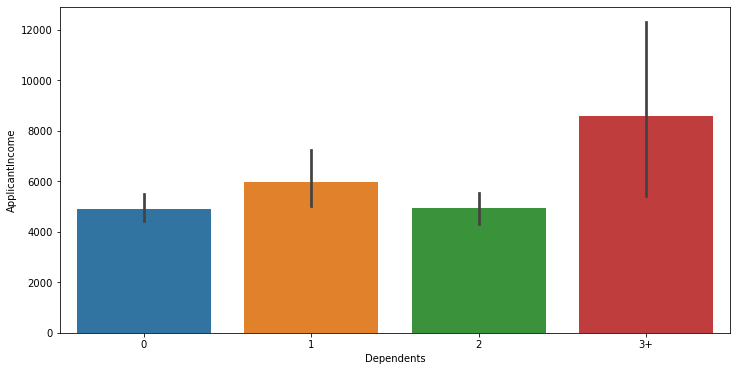

In [33]:
bar('ApplicantIncome','Dependents')

Average income of dependents of with 2 is less than with 1

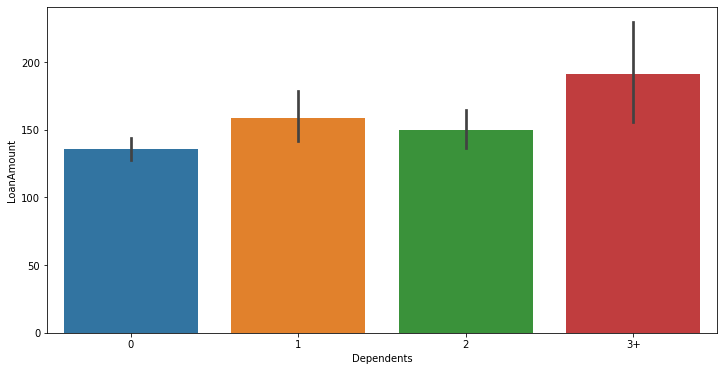

In [34]:
bar('LoanAmount','Dependents')

Averge loan amount by person with dependents more 3 is highest

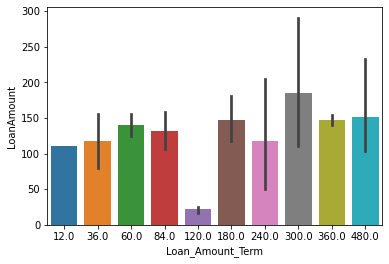

In [35]:
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=ds)

lets us check the null values

In [36]:
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Now lets fix the missing values one by one

In [37]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


we will use mode to fix all the object datatype column and we will use mean if there is no outlier or we will use median if there is outliers

lets see if there are any outliers in those columns using boxplot

We will use mode for Credit History column as there are only 2 values 1 and 0

In [38]:
mis = ['LoanAmount','Loan_Amount_Term']

In [39]:
ds[mis]

,LoanAmount,Loan_Amount_Term
0,NaN,360.0
1,128.0,360.0
2,66.0,360.0
3,120.0,360.0
4,141.0,360.0
...,...,...
609,71.0,360.0
610,40.0,180.0
611,253.0,360.0
612,187.0,360.0


lets now fix the missing values in the dataset

lets see the outliers in these two columns

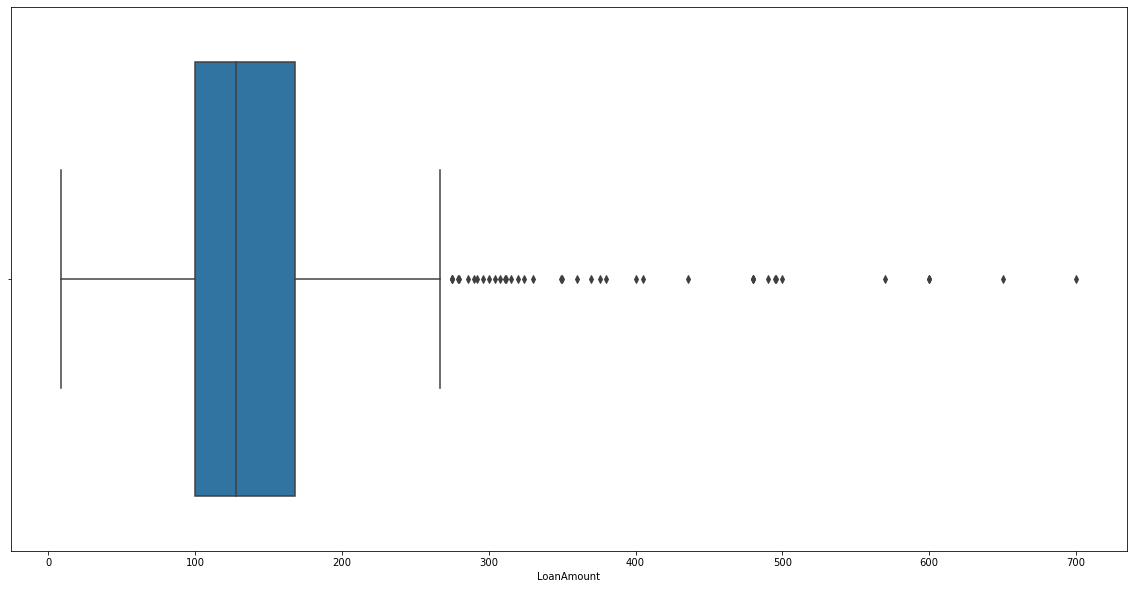

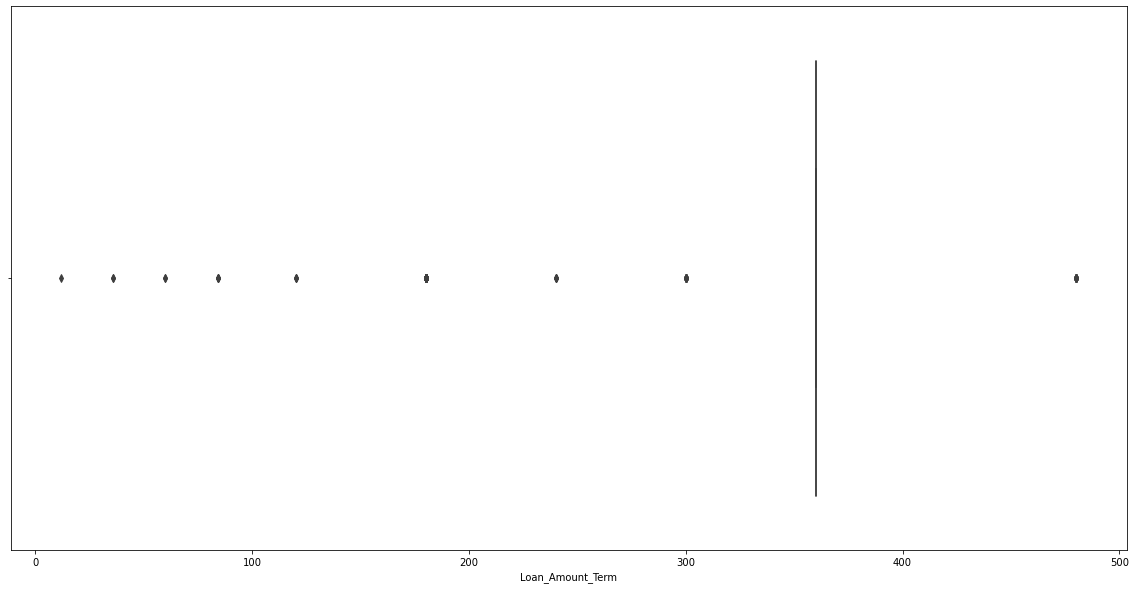

In [40]:
for i in mis:
    plt.figure(figsize = (20,10))
    sns.boxplot(ds[i])

from above we can see that there are outliers in the dataset so lets us fill the Nan values with mode of the columns respectively

In [41]:
print(ds['LoanAmount'].mode())
print(ds['Loan_Amount_Term'].mode())
print(ds['Credit_History'].mode())

0    120.0
dtype: float64
0    360.0
dtype: float64
0    1.0
dtype: float64


we will replace this values in place of Nan from all the three columns

In [42]:
ds['LoanAmount'].fillna(120.0, inplace=True)
ds['Loan_Amount_Term'].fillna(360.0, inplace = True)
ds['Credit_History'].fillna(1.0, inplace = True)

In [43]:
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

from above we can see that we have remove Nan column from numeric column lets now remove it from object type columns

In [44]:
print(ds['Gender'].mode())
print(ds['Married'].mode())
print(ds['Dependents'].mode())
print(ds['Self_Employed'].mode())

0    Male
dtype: object
0    Yes
dtype: object
0    0
dtype: object
0    No
dtype: object


from above we will change these columns by mode operation

In [45]:
ds['Gender'].fillna('Male', inplace = True)
ds['Married'].fillna('Yes', inplace=True)
ds['Dependents'].fillna(0, inplace=True)
ds['Self_Employed'].fillna('No', inplace=True)

In [46]:
ds.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

from above we can see that we have fixed all the nan values in all the columns and now the dataset has no missing values 

lets now see the skewness of the columns by using ds.skew()

In [47]:
ds.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

here we will take our skewness threshold as +/-0.5 by using Power transformation

In [48]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


first let us delete Loan Id column as it is not Useful to us

In [49]:
ds.drop('Loan_ID', axis = 1, inplace = True)

In [50]:
ds

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


lets us now remove outliers and remove skewness by using zscore and power transform lets remove the outliers first by using zscore.

lets fix the skewness of the column 

In [51]:
X = ds.drop('Loan_Status', axis =1)
Y = ds['Loan_Status']

In [52]:
X.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

lets visualize the skewness using density plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fdb9c40>,
      dtype=object)

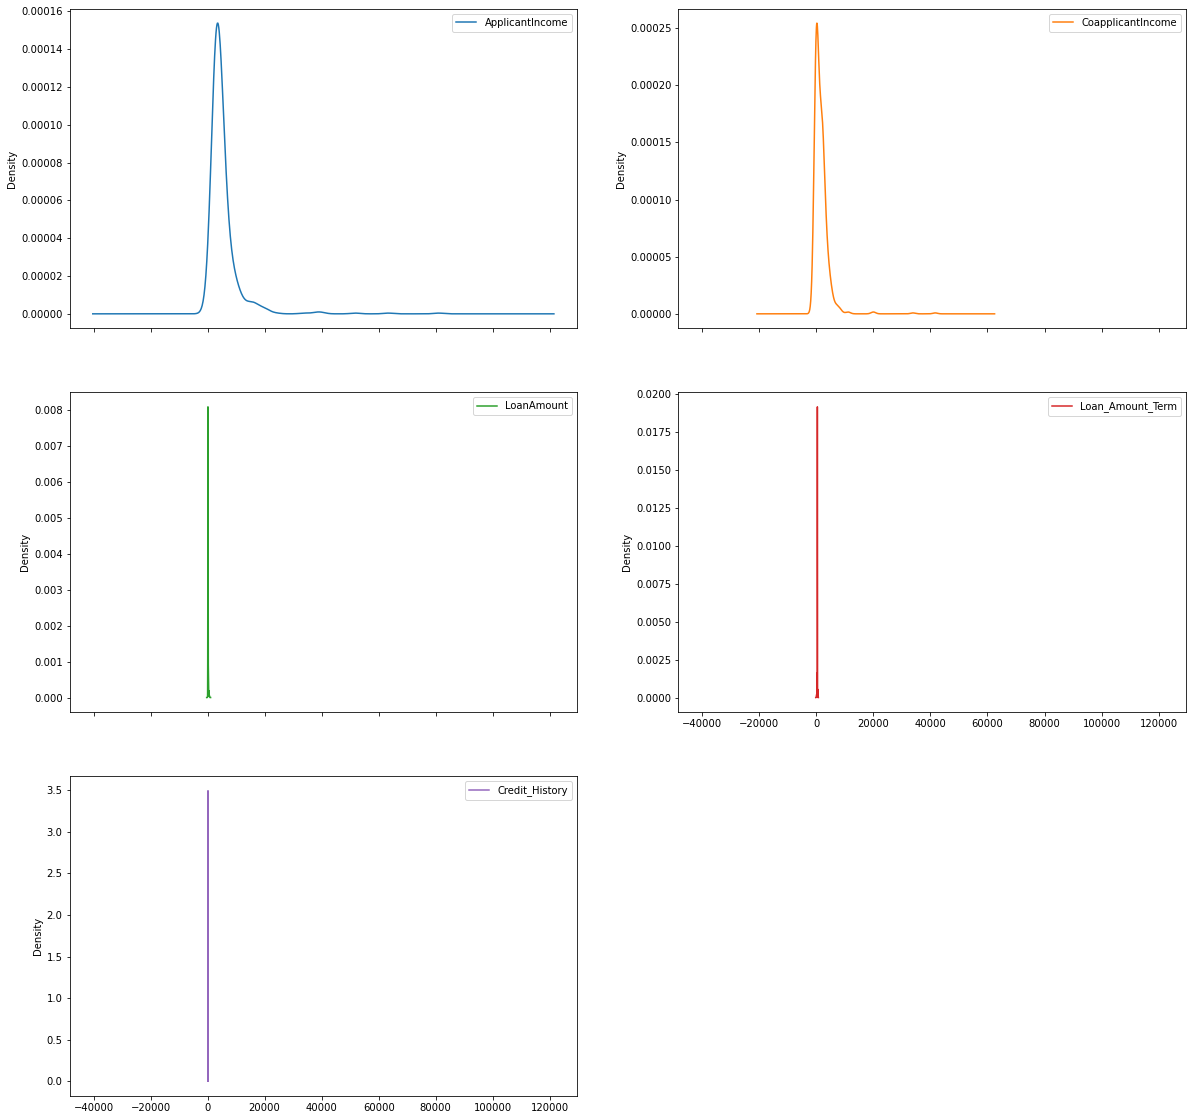

In [53]:
X.plot(kind = 'kde', subplots = True, layout = (3,2), figsize=(20,20))

from above we can see the skewness of the data

In [54]:
for index in X.skew().index:
    if X.skew().loc[index]>0.5:
        X[index]=np.log1p(X[index])

In [55]:
X.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.137460
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [56]:
X=pd.get_dummies(X,drop_first=True)

In [57]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,4.795791,360.0,1.0,1,0,1,0,0,0,0,0,0,1
1,8.430327,7.319202,4.859812,360.0,1.0,1,1,0,1,0,0,0,0,0,0
2,8.006701,0.000000,4.204693,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,7.857094,7.765993,4.795791,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,8.699681,0.000000,4.955827,360.0,1.0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,7.972811,0.000000,4.276666,360.0,1.0,0,0,1,0,0,0,0,0,0,0
610,8.320448,0.000000,3.713572,180.0,1.0,1,1,0,0,0,1,0,0,0,0
611,8.996280,5.484797,5.537334,360.0,1.0,1,1,0,1,0,0,0,0,0,1
612,8.933796,0.000000,5.236442,360.0,1.0,1,1,0,0,1,0,0,0,0,1


lets us now scale the values using Standard Scaler

In [58]:
sc=StandardScaler()

In [59]:
X_new = sc.fit_transform(X)
X_new = pd.DataFrame(X_new, columns = X.columns)

In [60]:
X_new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.516186,-1.107783,-0.138624,0.273231,0.411733,0.472343,-1.372089,0.883012,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
1,0.137806,0.782158,-0.008123,0.273231,0.411733,0.472343,0.728816,-1.132487,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208
2,-0.519479,-1.107783,-1.343509,0.273231,0.411733,0.472343,0.728816,0.883012,-0.446339,-0.443713,-0.300975,-0.528362,2.547117,-0.782016,1.428147
3,-0.751605,0.897526,-0.138624,0.273231,0.411733,0.472343,0.728816,0.883012,-0.446339,-0.443713,-0.300975,1.892641,-0.392601,-0.782016,1.428147
4,0.555727,-1.107783,0.187592,0.273231,0.411733,0.472343,-1.372089,0.883012,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.572062,-1.107783,-1.196800,0.273231,0.411733,-2.117107,-1.372089,0.883012,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208
610,-0.032679,-1.107783,-2.344602,-2.522836,0.411733,0.472343,0.728816,-1.132487,-0.446339,-0.443713,3.322532,-0.528362,-0.392601,-0.782016,-0.700208
611,1.015921,0.308483,1.372928,0.273231,0.411733,0.472343,0.728816,-1.132487,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
612,0.918972,-1.107783,0.759593,0.273231,0.411733,0.472343,0.728816,-1.132487,-0.446339,2.253710,-0.300975,-0.528362,-0.392601,-0.782016,1.428147


from above we can see that all the values are in the same range

lets us use label encoder on our Y varible

In [61]:
le = LabelEncoder()

In [62]:
le.fit(Y)
Y = le.fit_transform(Y)

In [63]:
Y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

from here we can see that we have succussfully converted out Y Variable

lets us split our data using train_test_split

In [64]:
X_train , X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.22, random_state = 42)

First we are taking random state as 42 then we will find out the best random state and then we will fit all the model using that random state and see which model performs better

In [65]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr.score(X_train, Y_train)

0.8221757322175732

In [66]:
predlr = lr.predict(X_test)
acclr = accuracy_score(Y_test, predlr)*100
print("Accuracy Score:",acclr)
print("Confusion matrix:", confusion_matrix(Y_test, predlr))
print("Classification Report:", classification_report(Y_test, predlr))

Accuracy Score: 77.20588235294117
Confusion matrix: [[20 28]
 [ 3 85]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.42      0.56        48
           1       0.75      0.97      0.85        88

    accuracy                           0.77       136
   macro avg       0.81      0.69      0.70       136
weighted avg       0.79      0.77      0.75       136



from above we can see that we are getting 77% accuracy at random state 42 lets us now find the best random_state

In [67]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), SVC(), GaussianNB(), KNeighborsClassifier(), XGBClassifier(silent = 0, verbosity = 0), XGBRFClassifier(silent = 0, verbosity = 0)]

In [68]:
maxacc = 0
maxrs = 0
for i in range(1,1000):
    X_train , X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.22, random_state = i)
    for m in models:
        m.fit(X_train, Y_train)
        pred = m.predict(X_test)
        acc = accuracy_score(Y_test, pred)
        if acc > maxacc:
            maxacc = acc
            maxrs = i
            
print("Maximum Accuracy is {} at Random State {}".format(maxacc, maxrs))

Maximum Accuracy is 0.8970588235294118 at Random State 368


from above we can see that we got a accuracy score of 90% lets now see all the model Accuracy score at Random State 368

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.22, random_state = 368)

In [70]:
print('Logistic Regression')
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
acclr = accuracy_score(Y_test, predlr)*100
print("Accuracy Score:", acclr)
print("Classification Report:", classification_report(Y_test, predlr))
print("Confusion Matrix:", confusion_matrix(Y_test, predlr))
scorelr = cross_val_score(lr,X,Y, cv = 5)
scorelr = scorelr.mean()*100
f1lr = f1_score(Y_test, predlr)*100
print("F1 Score:", f1lr)
print("Cross Validation Score:", scorelr)

Logistic Regression
Accuracy Score: 88.97058823529412
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.66      0.75        35
           1       0.89      0.97      0.93       101

    accuracy                           0.89       136
   macro avg       0.89      0.81      0.84       136
weighted avg       0.89      0.89      0.88       136

Confusion Matrix: [[23 12]
 [ 3 98]]
F1 Score: 92.89099526066352
Cross Validation Score: 80.78368652538984


In [71]:
print("Decision Tree Classifier")
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predtc = dtc.predict(X_test)
accdtc = accuracy_score(Y_test, predtc)*100
print("Accuracy Score", accdtc)
print("Classification Report:",classification_report(Y_test, predtc))
print("Confusion Matrix:", confusion_matrix(Y_test, predtc))
scoredtc = cross_val_score(dtc, X, Y, cv = 5)
scoredtc = scoredtc.mean()*100
f1dtc = f1_score(Y_test, predtc)*100
print("F1 Score:", f1dtc)
print("Cross Validation Score:", scoredtc)

Decision Tree Classifier
Accuracy Score 80.14705882352942
Classification Report:               precision    recall  f1-score   support

           0       0.59      0.77      0.67        35
           1       0.91      0.81      0.86       101

    accuracy                           0.80       136
   macro avg       0.75      0.79      0.76       136
weighted avg       0.83      0.80      0.81       136

Confusion Matrix: [[27  8]
 [19 82]]
F1 Score: 85.86387434554975
Cross Validation Score: 70.52245768359325


In [72]:
print("Random Forest Classifier")
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
predrfc = rfc.predict(X_test)
accrfc = accuracy_score(Y_test, predrfc)*100
print("Accuracy Score:", accrfc)
print("Classification Report:", classification_report(Y_test, predrfc))
print("Confusion Matrix:", confusion_matrix(Y_test, predrfc))
scorerfc = cross_val_score(rfc, X, Y, cv = 5)
scorerfc = scorerfc.mean()*100
print("Cross Validation Score:", scorerfc)
f1rfc = f1_score(Y_test, predrfc)*100
print("F1 Score:", f1rfc)

Random Forest Classifier
Accuracy Score: 87.5
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.66      0.73        35
           1       0.89      0.95      0.92       101

    accuracy                           0.88       136
   macro avg       0.86      0.80      0.82       136
weighted avg       0.87      0.88      0.87       136

Confusion Matrix: [[23 12]
 [ 5 96]]
Cross Validation Score: 78.33666533386646
F1 Score: 91.86602870813397


In [73]:
print("AdaBoost Classifier")
adb = AdaBoostClassifier()
adb.fit(X_train, Y_train)
predadb = adb.predict(X_test)
accadb = accuracy_score(Y_test, predadb)*100
print("Accuracy Score:", accadb)
print("Classification Report:", classification_report(Y_test, predadb))
print("Confusion Matrix:", confusion_matrix(Y_test, predadb))
scoreadb = cross_val_score(adb, X, Y, cv = 5)
scoreadb = scoreadb.mean()*100
print("Cross Validation Score:", scoreadb)
f1adb = f1_score(Y_test, predadb)*100
print("F1 Score:", f1adb)

AdaBoost Classifier
Accuracy Score: 88.23529411764706
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.90      0.95      0.92       101

    accuracy                           0.88       136
   macro avg       0.86      0.82      0.84       136
weighted avg       0.88      0.88      0.88       136

Confusion Matrix: [[24 11]
 [ 5 96]]
Cross Validation Score: 78.98840463814474
F1 Score: 92.3076923076923


In [74]:
print("SVC")
svc = SVC()
svc.fit(X_train, Y_train)
predsvc = svc.predict(X_test)
accsvc = accuracy_score(Y_test, predsvc)*100
print("Accuracy Score:", accsvc)
print("Classification report:", classification_report(Y_test, predsvc))
print("Confusion Matrix:", confusion_matrix(Y_test, predsvc))
scoresvc = cross_val_score(svc, X, Y, cv = 5)
scoresvc = scoresvc.mean()*100
print("Cross Validation Score:", scoresvc)
f1svc = f1_score(Y_test, predsvc)*100
print("F1 Score:", f1svc)

SVC
Accuracy Score: 74.26470588235294
Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.74      1.00      0.85       101

    accuracy                           0.74       136
   macro avg       0.37      0.50      0.43       136
weighted avg       0.55      0.74      0.63       136

Confusion Matrix: [[  0  35]
 [  0 101]]
Cross Validation Score: 68.72984139677463
F1 Score: 85.23206751054853


In [75]:
print("Gaussian NB")
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
predgnb = gnb.predict(X_test)
accgnb = accuracy_score(Y_test, predgnb)*100
print("Accuracy Score:", accgnb)
print("Classification report:", classification_report(Y_test, predgnb))
print("Confusion Matrix:", confusion_matrix(Y_test, predgnb))
scoregnb = cross_val_score(gnb, X, Y, cv = 5)
scoregnb = scoregnb.mean()*100
print("Cross Validation Score:", scoregnb)
f1gnb = f1_score(Y_test, predgnb)*100
print("F1 Score:", f1gnb)

Gaussian NB
Accuracy Score: 88.23529411764706
Classification report:               precision    recall  f1-score   support

           0       0.88      0.63      0.73        35
           1       0.88      0.97      0.92       101

    accuracy                           0.88       136
   macro avg       0.88      0.80      0.83       136
weighted avg       0.88      0.88      0.88       136

Confusion Matrix: [[22 13]
 [ 3 98]]
Cross Validation Score: 80.62108489937359
F1 Score: 92.45283018867924


In [76]:
print("KNearestClassifier")
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predknn = knn.predict(X_test)
accknn = accuracy_score(Y_test, predknn)*100
print("Accuracy Score:", accknn)
print("Classification Report:", classification_report(Y_test, predknn))
print("Confusion Matrix:", confusion_matrix(Y_test, predknn))
scoreknn = cross_val_score(knn, X, Y, cv = 5)
scoreknn = scoreknn.mean()*100
f1knn = f1_score(Y_test, predknn)*100
print("Cross Validation Score:", scoreknn)
print("F1 Score:", f1knn)

KNearestClassifier
Accuracy Score: 79.41176470588235
Classification Report:               precision    recall  f1-score   support

           0       0.68      0.37      0.48        35
           1       0.81      0.94      0.87       101

    accuracy                           0.79       136
   macro avg       0.75      0.66      0.68       136
weighted avg       0.78      0.79      0.77       136

Confusion Matrix: [[13 22]
 [ 6 95]]
Cross Validation Score: 72.31107556977209
F1 Score: 87.1559633027523


In [77]:
print('XGBClassifier')
xgb = XGBClassifier(verbosity = 0)
xgb.fit(X_train, Y_train)
predxgb = xgb.predict(X_test)
accxgb = accuracy_score(Y_test, predxgb)*100
print("Accuracy Score:", accxgb)
print("Classification Report:", classification_report(Y_test, predxgb))
print("Confusion Matrix:", confusion_matrix(Y_test, predxgb))
scorexgb = cross_val_score(xgb, X, Y, cv = 5)
scorexgb = scorexgb.mean()*100
print("Cross Validation Score:", scorexgb)
f1xgb = f1_score(Y_test, predxgb)*100
print("F1 Score:", f1xgb)

XGBClassifier
Accuracy Score: 84.55882352941177
Classification Report:               precision    recall  f1-score   support

           0       0.71      0.69      0.70        35
           1       0.89      0.90      0.90       101

    accuracy                           0.85       136
   macro avg       0.80      0.79      0.80       136
weighted avg       0.84      0.85      0.84       136

Confusion Matrix: [[24 11]
 [10 91]]
Cross Validation Score: 75.40583766493401
F1 Score: 89.65517241379311


In [78]:
print('XGBRFClassifier')
xgbrfc = XGBRFClassifier(verbosity = 0)
xgbrfc.fit(X_train, Y_train)
predxgbrfc = xgbrfc.predict(X_test)
accxgbrfc = accuracy_score(Y_test, predxgbrfc)*100
print("Accuracy Score:", accxgbrfc)
print("Classification Report:", classification_report(Y_test, predxgbrfc))
print("Confusion Matrix:", confusion_matrix(Y_test, predxgbrfc))
scorexgbrfc = cross_val_score(xgbrfc, X, Y, cv = 5)
scorexgbrfc = scorexgbrfc.mean()*100
print("Cross Validation Score:", scorexgbrfc)
f1xgbrfc = f1_score(Y_test, predxgbrfc)*100
print("F1 Score:", f1xgbrfc)

XGBRFClassifier
Accuracy Score: 88.23529411764706
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.63      0.73        35
           1       0.88      0.97      0.92       101

    accuracy                           0.88       136
   macro avg       0.88      0.80      0.83       136
weighted avg       0.88      0.88      0.88       136

Confusion Matrix: [[22 13]
 [ 3 98]]
Cross Validation Score: 80.13061442089831
F1 Score: 92.45283018867924


now let us see the difference between all the model so thar we can compare between all the model and to figure out which model has done better

In [79]:
diff = { 
    'Model Name':['Logistic Regression','Decision Tree', 'Random Forest', 'AdaBoost', 'SVC', 'Gaussian NB', 'KNeighbours Classifier', 'XGBClassifier','XGBRFCClassifier'],
    'Accuracy Score':[acclr, accdtc, accrfc, accadb, accsvc, accgnb, accknn, accxgb, accxgbrfc],
    'Cross Validation Score':[scorelr, scoredtc, scorerfc, scoreadb, scoresvc, scoregnb, scoreknn, scorexgb, scorexgbrfc],
    'Accuracy Score - Cross validation Score':[acclr-scorelr, accdtc-scoredtc, accrfc-scorerfc, accadb-scoreadb, accsvc-scoresvc, accgnb-scoregnb, accknn-scoreknn, accxgb-scorexgb, accxgbrfc-scorexgbrfc],
    'F1 Score':[f1lr, f1dtc, f1rfc, f1adb, f1svc, f1gnb, f1knn, f1xgb, f1xgbrfc]
}

In [80]:
compare = pd.DataFrame.from_dict(diff)

In [81]:
compare

,Model Name,Accuracy Score,Cross Validation Score,Accuracy Score - Cross validation Score,F1 Score
0,Logistic Regression,88.970588,80.783687,8.186902,92.890995
1,Decision Tree,80.147059,70.522458,9.624601,85.863874
2,Random Forest,87.500000,78.336665,9.163335,91.866029
3,AdaBoost,88.235294,78.988405,9.246889,92.307692
4,SVC,74.264706,68.729841,5.534864,85.232068
5,Gaussian NB,88.235294,80.621085,7.614209,92.452830
6,KNeighbours Classifier,79.411765,72.311076,7.100689,87.155963
7,XGBClassifier,84.558824,75.405838,9.152986,89.655172
8,XGBRFCClassifier,88.235294,80.130614,8.104680,92.452830


from above we can see that SVC, KNeighbours, Gaussian NB,Decision Tree, XGBRFCClassifier, Random Forest has done well so we will choose these model and perform GridSearchCV on them

In [82]:
parameterrfc = {
    'n_estimators':[100,200,300],
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4],
    'n_jobs':[1,2,3]
}

In [83]:
parametergnb = {
    'priors': [None],
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001]
}

In [84]:
parameterdtc = {
    'criterion':['gini','entropy'],
    'splitter':['random','best'],
    'max_depth':[1,2,3,4]
}

In [85]:
parameterxgbrfc = {
    'max_depth':[6,12,18,24],
    'gamma':[1,2,3,4],
    'min_child_Weight':[1,2,3],
    'verbosity':[0],
    'silent':[1]
}

In [86]:
parameterknn = {
    'n_neighbors':[1,2,3,4,5],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'p':[1,2,3,4]
}

In [87]:
parametersvc = {
    'C':[1,2,3],
    'kernel':['linear','poly','rbf']
}

In [88]:
GSCVrfc = GridSearchCV(rfc, parameterrfc)
GSCVgnb = GridSearchCV(gnb, parametergnb)
GSCVdtc = GridSearchCV(dtc, parameterdtc)
GSCVknn = GridSearchCV(knn, parameterknn)
GSCVxgbrfc = GridSearchCV(xgbrfc, parameterxgbrfc)
GSCVsvc = GridSearchCV(svc, parametersvc)

In [89]:
GSCVrfc.fit(X_train, Y_train)
GSCV_predictrfc = GSCVrfc.best_estimator_.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, GSCV_predictrfc))
print("Classification Report:", classification_report(Y_test, GSCV_predictrfc))
print("Confusion Matrix:", confusion_matrix(Y_test, GSCV_predictrfc))

Accuracy Score: 0.8823529411764706
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.63      0.73        35
           1       0.88      0.97      0.92       101

    accuracy                           0.88       136
   macro avg       0.88      0.80      0.83       136
weighted avg       0.88      0.88      0.88       136

Confusion Matrix: [[22 13]
 [ 3 98]]


In [90]:
GSCVgnb.fit(X_train, Y_train)
GSCV_predictgnb = GSCVgnb.best_estimator_.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, GSCV_predictgnb))
print("Classification Report:", classification_report(Y_test, GSCV_predictgnb))
print("Confusion Matrix:", confusion_matrix(Y_test, GSCV_predictgnb))

Accuracy Score: 0.8823529411764706
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.63      0.73        35
           1       0.88      0.97      0.92       101

    accuracy                           0.88       136
   macro avg       0.88      0.80      0.83       136
weighted avg       0.88      0.88      0.88       136

Confusion Matrix: [[22 13]
 [ 3 98]]


In [91]:
GSCVxgbrfc.fit(X_train, Y_train)
GSCV_predictxgbrfc = GSCVxgbrfc.best_estimator_.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, GSCV_predictxgbrfc))
print("Classification Report:", classification_report(Y_test, GSCV_predictxgbrfc))
print("Confusion Matrix:", confusion_matrix(Y_test, GSCV_predictxgbrfc))

Accuracy Score: 0.8823529411764706
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.63      0.73        35
           1       0.88      0.97      0.92       101

    accuracy                           0.88       136
   macro avg       0.88      0.80      0.83       136
weighted avg       0.88      0.88      0.88       136

Confusion Matrix: [[22 13]
 [ 3 98]]


In [92]:
GSCVdtc.fit(X_train, Y_train)
GSCV_predictdtc = GSCVdtc.best_estimator_.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, GSCV_predictdtc))
print("Classification Report:", classification_report(Y_test, GSCV_predictdtc))
print("Confusion Matrix:", confusion_matrix(Y_test, GSCV_predictdtc))

Accuracy Score: 0.8970588235294118
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.63      0.76        35
           1       0.88      0.99      0.93       101

    accuracy                           0.90       136
   macro avg       0.92      0.81      0.85       136
weighted avg       0.90      0.90      0.89       136

Confusion Matrix: [[ 22  13]
 [  1 100]]


In [93]:
GSCVknn.fit(X_train, Y_train)
GSCV_predictknn = GSCVknn.best_estimator_.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, GSCV_predictknn))
print("Classification Report:", classification_report(Y_test, GSCV_predictknn))
print("Confusion Matrix:", confusion_matrix(Y_test, GSCV_predictknn))

Accuracy Score: 0.7573529411764706
Classification Report:               precision    recall  f1-score   support

           0       0.54      0.40      0.46        35
           1       0.81      0.88      0.84       101

    accuracy                           0.76       136
   macro avg       0.67      0.64      0.65       136
weighted avg       0.74      0.76      0.74       136

Confusion Matrix: [[14 21]
 [12 89]]


In [94]:
GSCVsvc.fit(X_train, Y_train)
GSCV_predictsvc = GSCVsvc.best_estimator_.predict(X_test)
print("Accuracy Score:", accuracy_score(Y_test, GSCV_predictsvc))
print("Classification Report:", classification_report(Y_test, GSCV_predictsvc))
print("Confusion Matrix:", confusion_matrix(Y_test, GSCV_predictsvc))

Accuracy Score: 0.8970588235294118
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.63      0.76        35
           1       0.88      0.99      0.93       101

    accuracy                           0.90       136
   macro avg       0.92      0.81      0.85       136
weighted avg       0.90      0.90      0.89       136

Confusion Matrix: [[ 22  13]
 [  1 100]]


from above we have seen the model GridSearchCV Accuracy score so now we will see the Auc Roc curve and the model which performs well in the auc roc curve we will select it as out best model

In [95]:
fpr, tpr, thresholds = roc_curve(Y_test, GSCV_predictrfc)
roc_auc = auc(fpr, tpr)
fpr1, tpr1, thresholds = roc_curve(Y_test, GSCV_predictgnb)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, thresholds = roc_curve(Y_test, GSCV_predictdtc)
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, thresholds = roc_curve(Y_test, GSCV_predictknn)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, thresholds = roc_curve(Y_test, GSCV_predictxgbrfc)
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, thresholds = roc_curve(Y_test, GSCV_predictsvc)
roc_auc5 = auc(fpr5, tpr5)

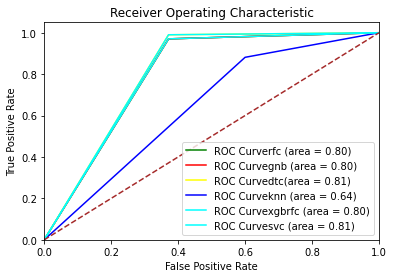

In [96]:
plt.figure()
plt.plot(fpr, tpr, color='green', label = "ROC Curverfc (area = %0.2f)" %roc_auc)
plt.plot(fpr1, tpr1, color='red', label = "ROC Curvegnb (area = %0.2f)" %roc_auc1)
plt.plot(fpr2, tpr2, color='yellow', label = "ROC Curvedtc(area = %0.2f)" %roc_auc2)
plt.plot(fpr3, tpr3, color='blue', label = "ROC Curveknn (area = %0.2f)" %roc_auc3)
plt.plot(fpr4, tpr4, color='cyan', label = "ROC Curvexgbrfc (area = %0.2f)" %roc_auc4)
plt.plot(fpr4, tpr5, color='cyan', label = "ROC Curvesvc (area = %0.2f)" %roc_auc5)
plt.plot([0,1],[0,1], color='brown', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")

from above we can see both svc and dtc has performed very well and has the heighest area under the curve as 81% so now we can choose the best model  between these two model and save it for further usage

as from cross validation we can see that SVC is the best model so we will select SVC as our best model and save it using joblib.dump

In [97]:
joblib.dump(GSCVsvc.best_estimator_, 'LoanApplication.pkl')

['LoanApplication.pkl']

## from above we can see that SVC is measuring the performance across all possible classification thresholds with an Area under Curve of 81% so we are choosing this model and performed well in Cross validation so we are saving SVC as our best model

lets see the Actual and predicted values

In [98]:
values = {
    'True Values':Y_test,
    'Predicted Values':GSCV_predictsvc
}

In [99]:
values = pd.DataFrame.from_dict(values)

In [100]:
pd.set_option('display.max_rows', None)

In [101]:
values

,True Values,Predicted Values
0,0,0
1,1,1
2,1,1
3,0,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,0,0


from above we can see all the true values and the predicted values of the dataset

### By using LoanApplication.pkl we can use it for different Census Dataset with Similar Columns